# Machine Learning Lab 3

## Loading the Iris Dataset


In [81]:
from scipy.io import arff
import pandas as pd
import seaborn as sns
sns.set_theme() # Adds seaborn styling to matplotlib figures

# load the iris.arff data set
data = arff.loadarff('data/iris.arff')
iris_df = pd.DataFrame(data[0])
iris_df['class'] = iris_df['class'].str.decode('utf-8') # fixes byte strings, avoiding strings like b'Iris-versicolor'

# print the top of the file (just to check it's read and processed OK)
iris_df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Dataset information / basic stats

In [82]:
print("\nGeneral info\n")
print(iris_df.info())

print("\nStatistics (of numeric features)\n")
print(iris_df.describe())

print("\nInfo about the class\n")
print(iris_df['class'].describe(),"\n")
print(iris_df['class'].value_counts())


General info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Statistics (of numeric features)

       sepallength  sepalwidth  petallength  petalwidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.054000     3.758667    1.198667
std       0.828066    0.433594     1.764420    0.763161
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.350000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    

## Basic Plotting

<AxesSubplot: >

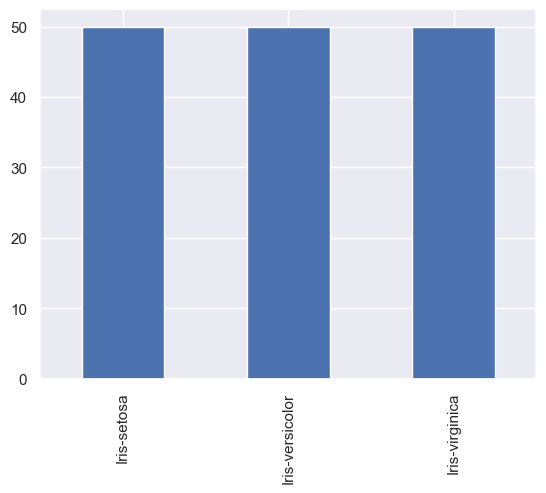

In [83]:
import matplotlib.pyplot as plt

# task 1.3.1
plt.figure()
iris_df['class'].value_counts().plot(kind="bar")

<AxesSubplot: >

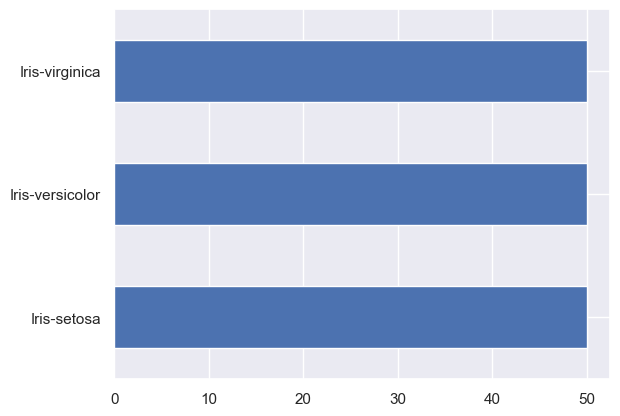

In [84]:
# task 1.3.2
plt.figure()
iris_df['class'].value_counts().plot(kind="barh")

<AxesSubplot: >

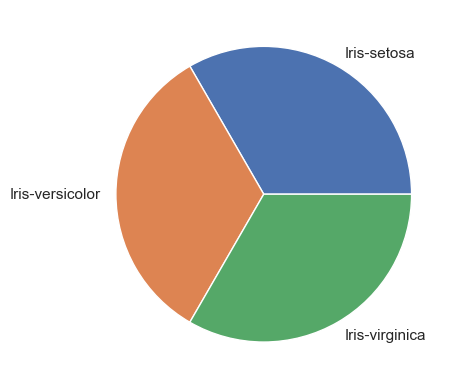

In [85]:
# Task 1.3.3
plt.figure()
iris_df['class'].value_counts().plot(kind="pie", ylabel="")

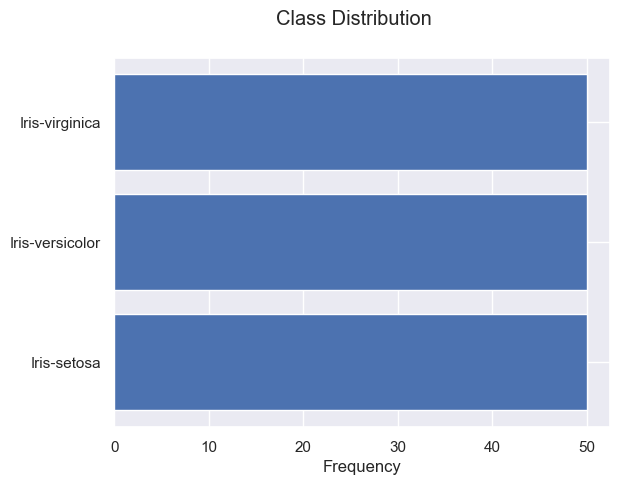

In [86]:
# Task 1.3.4 - the matplotlib way (better than the lab tasks originally set up...)

# Get a Pandas Series of the value counts for the class
# - https://pandas.pydata.org/docs/reference/api/pandas.Series.html
# - It's essentially like a vector (array) with lots of metadata, like a Pandas DataFrame is a matrix with lots of metadata
class_series = iris_df['class'].value_counts()

# Setting up the figure
plt.figure()
plt.suptitle('Class Distribution')
plt.xlabel('Frequency')
#plt.ylabel('Class') # commented this out, as it is obvious due to the title added to the chart

# Plotting the horizontal bar
# - .index = the class names
# - .values will return the number of instances for each class
plt.barh(class_series.index, class_series.values)

# Good practice to call .show() when working with matplotlib directly like in this example
plt.show()

<AxesSubplot: title={'center': 'Class Distribution'}, xlabel='Frequency'>

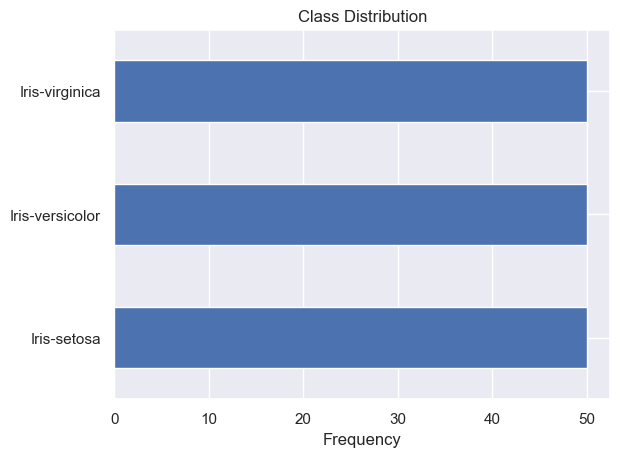

In [87]:
# Task 1.3.4
plt.figure()
iris_df['class'].value_counts().plot(kind="barh", title='Class Distribution', xlabel='Frequency')

## Visualising feature data

<AxesSubplot: title={'center': 'Sepal length'}, ylabel='Frequency'>

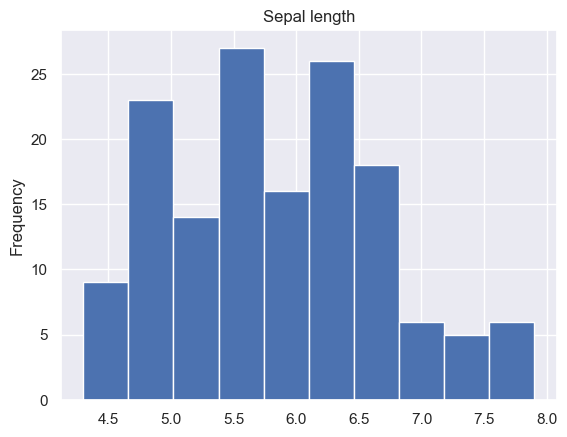

In [88]:
# Task 1.4.1
plt.figure()
iris_df['sepallength'].plot(kind='hist', title='Sepal length')

<AxesSubplot: title={'center': 'Sepal width'}, ylabel='Frequency'>

<Figure size 640x480 with 0 Axes>

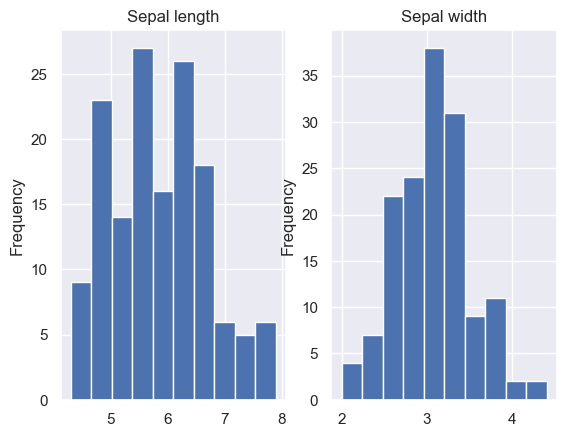

In [89]:
# Task 1.4.2
fig = plt.figure()

# Setting up figure with two sub-plots
fig, axs = plt.subplots(nrows=1, ncols=2)

# Plotting to axes 0 and 1 (zero indexed, like a normal array)
iris_df['sepallength'].plot(ax=axs[0], kind='hist', title='Sepal length')
iris_df['sepalwidth'].plot(ax=axs[1], kind='hist', title='Sepal width')

<AxesSubplot: title={'center': 'Sepal width'}, ylabel='Frequency'>

<Figure size 640x480 with 0 Axes>

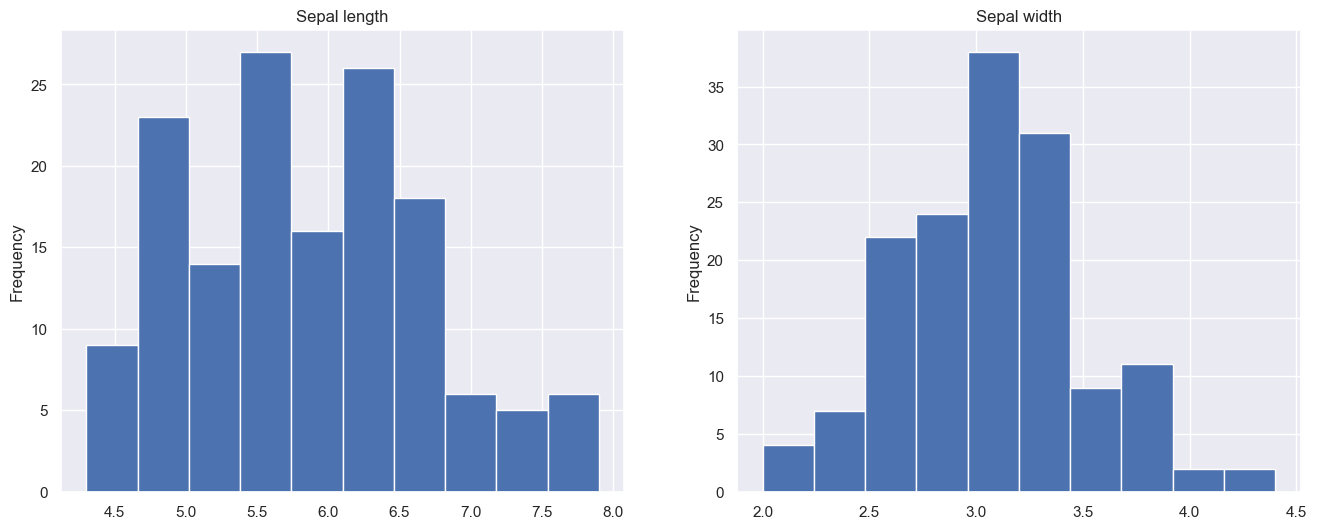

In [90]:
# Task 1.4.2
fig = plt.figure()

# Setting up figure with two sub-plots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6)) # adds figure size

# Plotting to axes 0 and 1 (zero indexed, like a normal array)
iris_df['sepallength'].plot(ax=axs[0], kind='hist', title='Sepal length')
iris_df['sepalwidth'].plot(ax=axs[1], kind='hist', title='Sepal width')

<AxesSubplot: ylabel='Frequency'>

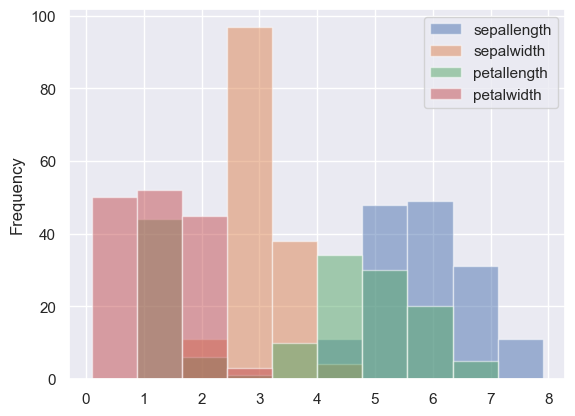

In [91]:
# Task 1.4.3 - a histogram for all features
iris_df.plot(kind='hist', alpha=0.5)

array([[<AxesSubplot: xlabel='sepallength', ylabel='sepallength'>,
        <AxesSubplot: xlabel='sepalwidth', ylabel='sepallength'>,
        <AxesSubplot: xlabel='petallength', ylabel='sepallength'>,
        <AxesSubplot: xlabel='petalwidth', ylabel='sepallength'>],
       [<AxesSubplot: xlabel='sepallength', ylabel='sepalwidth'>,
        <AxesSubplot: xlabel='sepalwidth', ylabel='sepalwidth'>,
        <AxesSubplot: xlabel='petallength', ylabel='sepalwidth'>,
        <AxesSubplot: xlabel='petalwidth', ylabel='sepalwidth'>],
       [<AxesSubplot: xlabel='sepallength', ylabel='petallength'>,
        <AxesSubplot: xlabel='sepalwidth', ylabel='petallength'>,
        <AxesSubplot: xlabel='petallength', ylabel='petallength'>,
        <AxesSubplot: xlabel='petalwidth', ylabel='petallength'>],
       [<AxesSubplot: xlabel='sepallength', ylabel='petalwidth'>,
        <AxesSubplot: xlabel='sepalwidth', ylabel='petalwidth'>,
        <AxesSubplot: xlabel='petallength', ylabel='petalwidth'>,
      

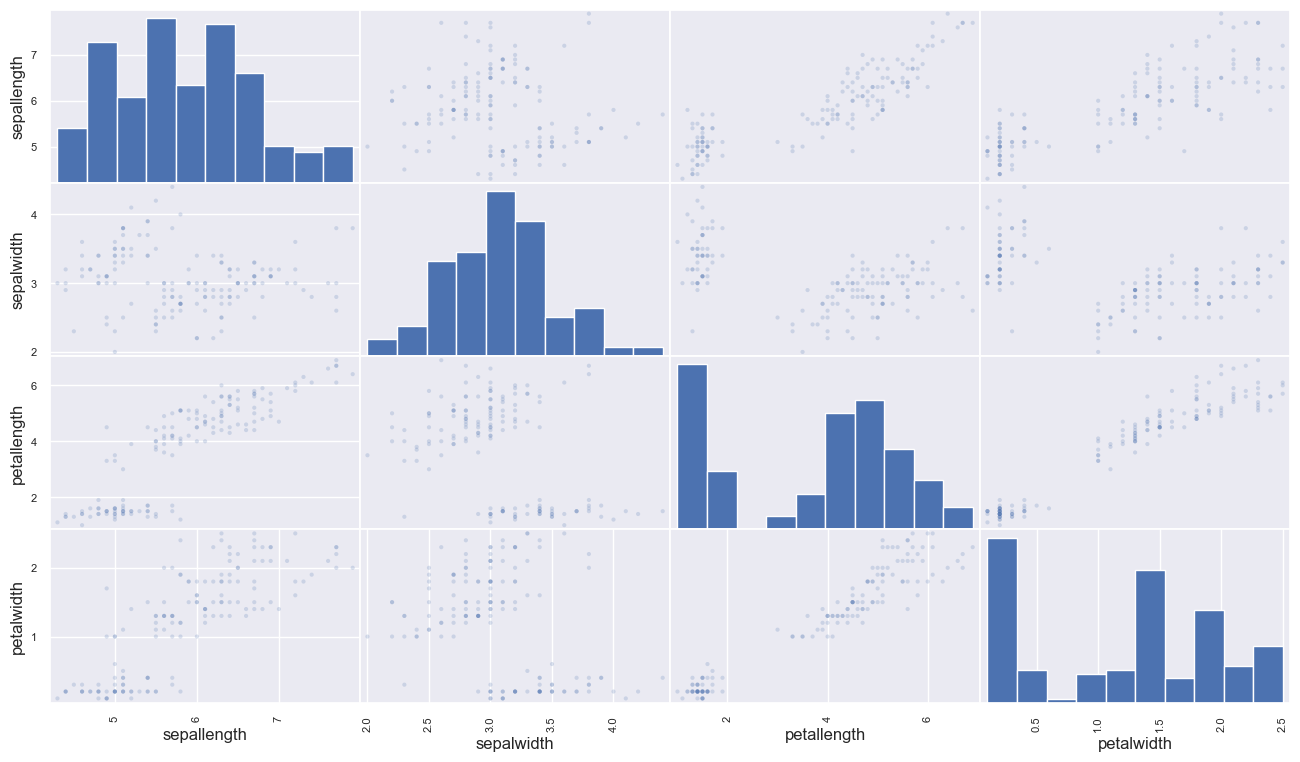

In [92]:
# Task 1.4.4

from pandas.plotting import scatter_matrix

scatter_matrix(iris_df, alpha=0.2, figsize=(16, 9))

array([[<AxesSubplot: xlabel='sepallength', ylabel='sepallength'>,
        <AxesSubplot: xlabel='sepalwidth', ylabel='sepallength'>,
        <AxesSubplot: xlabel='petallength', ylabel='sepallength'>,
        <AxesSubplot: xlabel='petalwidth', ylabel='sepallength'>],
       [<AxesSubplot: xlabel='sepallength', ylabel='sepalwidth'>,
        <AxesSubplot: xlabel='sepalwidth', ylabel='sepalwidth'>,
        <AxesSubplot: xlabel='petallength', ylabel='sepalwidth'>,
        <AxesSubplot: xlabel='petalwidth', ylabel='sepalwidth'>],
       [<AxesSubplot: xlabel='sepallength', ylabel='petallength'>,
        <AxesSubplot: xlabel='sepalwidth', ylabel='petallength'>,
        <AxesSubplot: xlabel='petallength', ylabel='petallength'>,
        <AxesSubplot: xlabel='petalwidth', ylabel='petallength'>],
       [<AxesSubplot: xlabel='sepallength', ylabel='petalwidth'>,
        <AxesSubplot: xlabel='sepalwidth', ylabel='petalwidth'>,
        <AxesSubplot: xlabel='petallength', ylabel='petalwidth'>,
      

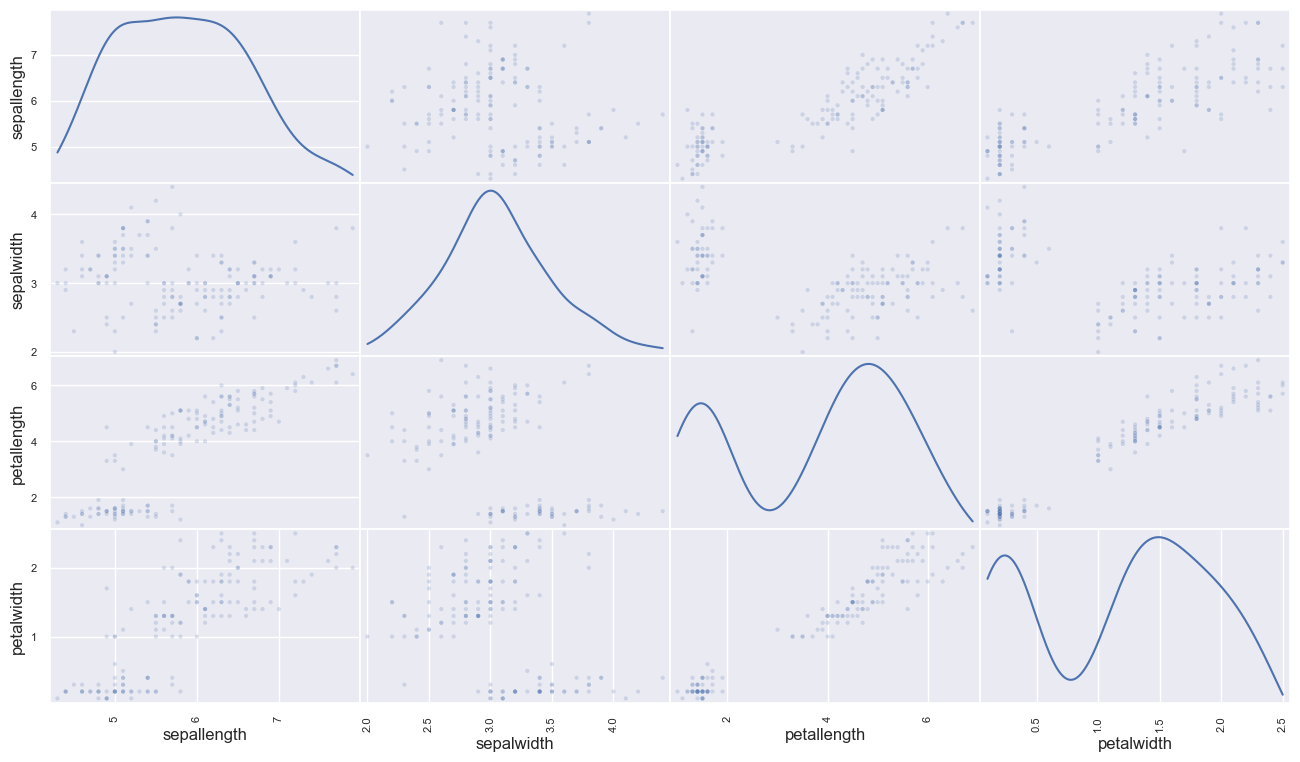

In [93]:
# Task 1.4.4 - with kernel density estimation; a taster on something to come ;)

from pandas.plotting import scatter_matrix

scatter_matrix(iris_df, alpha=0.2, figsize=(16, 9), diagonal='kde')

<AxesSubplot: title={'center': 'Sepal length vs width - no colours according to class :('}, xlabel='sepallength', ylabel='sepalwidth'>

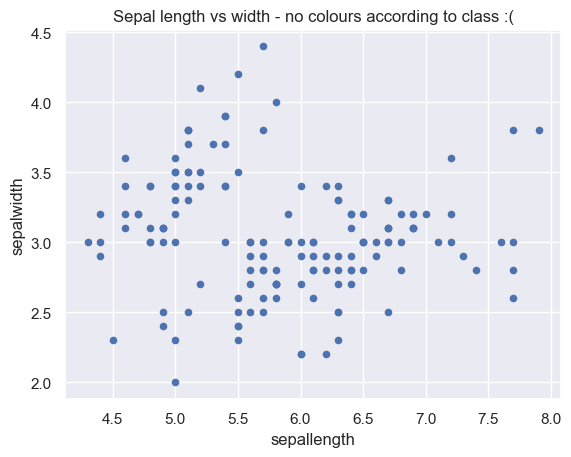

In [94]:
# Task 1.4.5 - a simple scatter plot for sepal length vs sepal width
iris_df.plot(kind='scatter', x='sepallength', y='sepalwidth', title='Sepal length vs width - no colours according to class :(')

<Figure size 640x480 with 0 Axes>

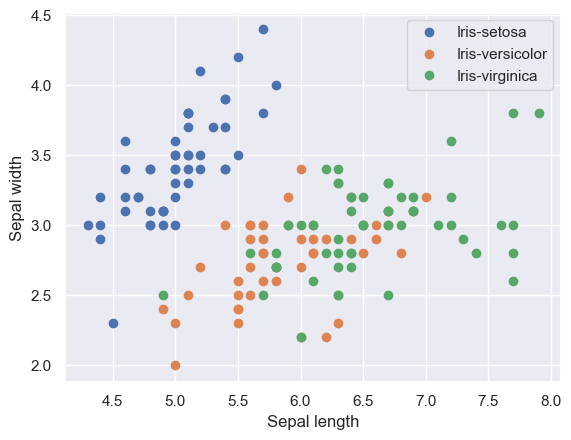

In [95]:
# Task 1.4.6 - a colour coded scatter plot according to class (also for for sepal length vs sepal width)
fig = plt.figure();
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

# group the data instances according to the different classes they belong to
groups = iris_df.groupby('class')

# iterate over each group and plot (scatter)
for name, group in groups:
    ax.plot(group.sepallength, group.sepalwidth, marker='.', linestyle='', ms=12, label=name)

# set labels for the y and x axes
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')

# add legend to the figure
ax.legend()

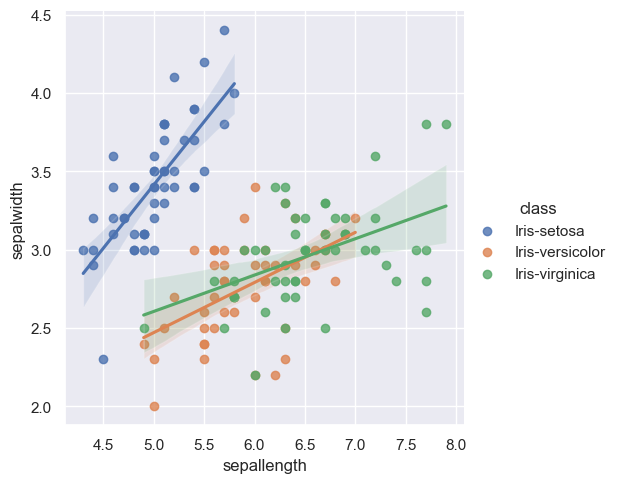

In [96]:
import seaborn as sns
sns.lmplot(data=iris_df, x="sepallength", y="sepalwidth", hue='class')

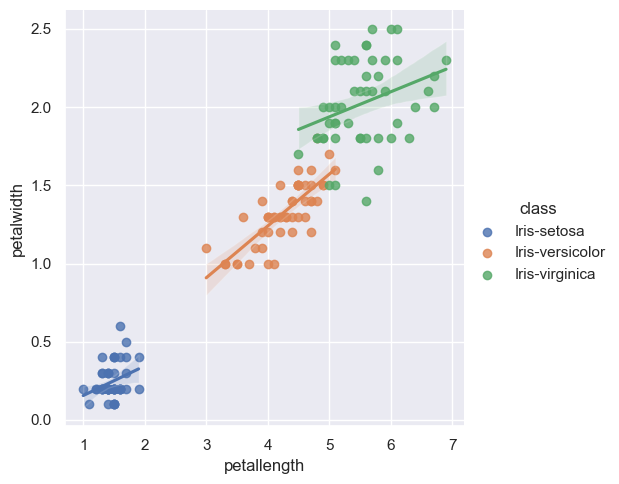

In [97]:
import seaborn as sns
sns.lmplot(data=iris_df, x="petallength", y="petalwidth", hue='class')

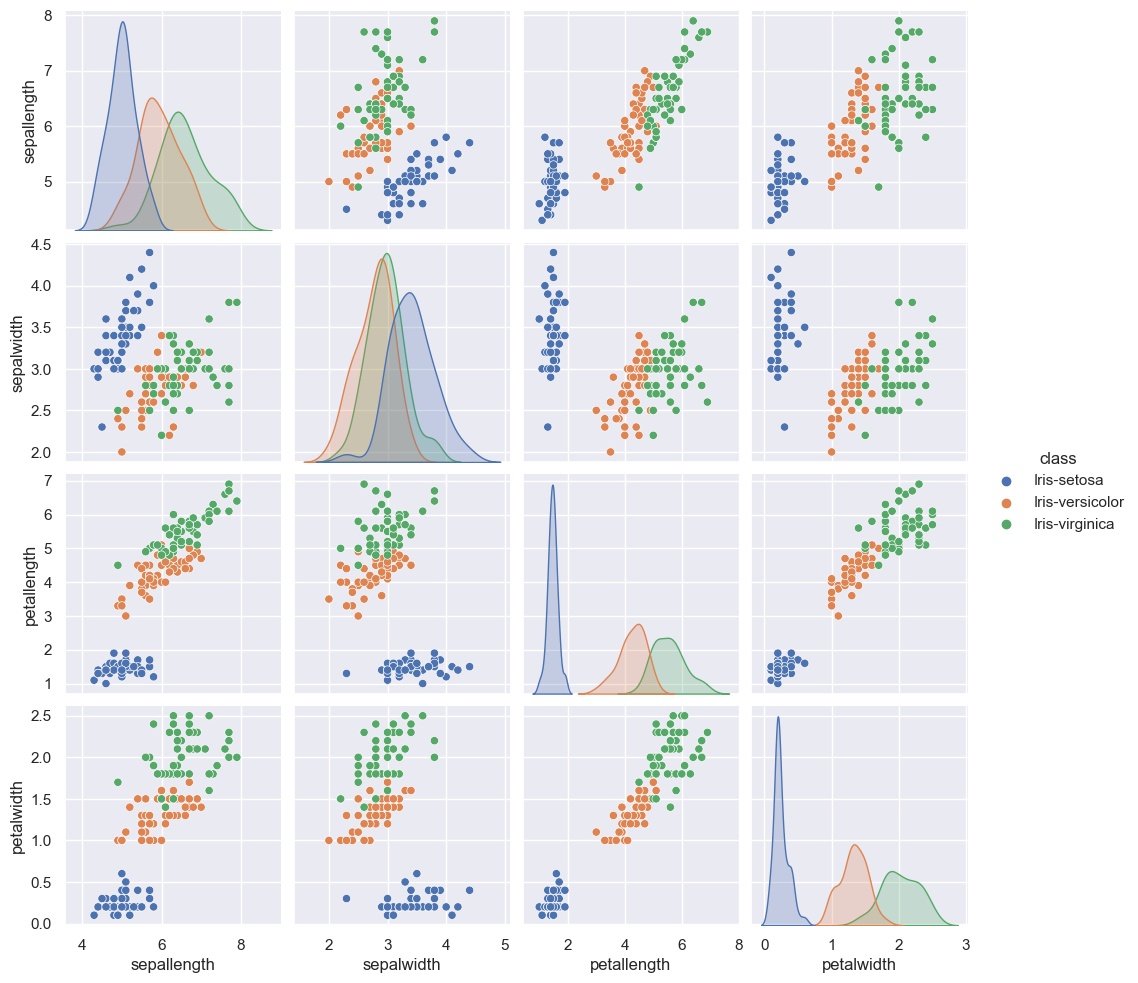

In [98]:
sns.pairplot(data=iris_df, hue="class")

## Noise

Text(0, 0.5, 'Cm')

<Figure size 640x480 with 0 Axes>

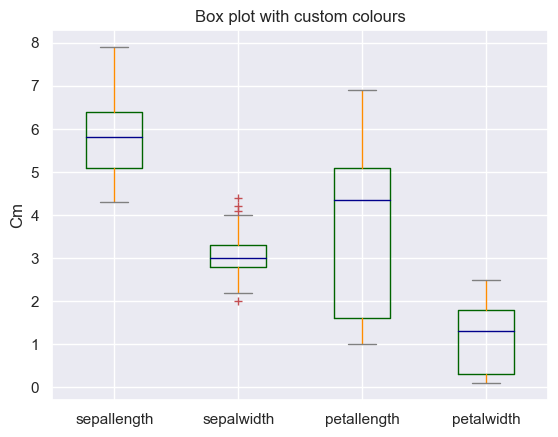

In [99]:
plt.figure();

# setting up custom colouring
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange', 'medians': 'DarkBlue', 'caps': 'Gray'}

# a box plot for all features
box_plot = iris_df.plot.box(color=color, sym='r+');
box_plot.set_title('Box plot with custom colours')
box_plot.set_ylabel('Cm')

<AxesSubplot: >

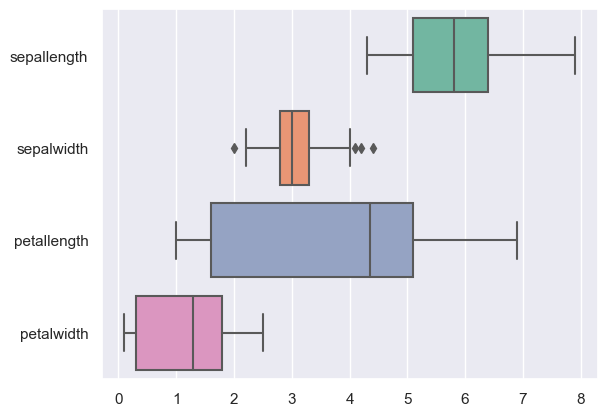

In [100]:
# and... using Seborn
sns.boxplot(data=iris_df, orient="h", palette="Set2")

## Correlation Analysis

In [101]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

corr, _ = pearsonr(iris_df['sepallength'], iris_df['sepalwidth'])
print('Sepal length & sepal width (Pearson):  %.3f' % corr)

corr, _ = spearmanr(iris_df['sepallength'], iris_df['sepalwidth'])
print('Sepal length & sepal width (Spearman): %.3f' % corr)

Sepal length & sepal width (Pearson):  -0.109
Sepal length & sepal width (Spearman): -0.159


In [102]:
# Compute pairwise correlation of all features

# Using Pearson's (linear relationship) - assumes normal distribution
corr = iris_df.corr(method='pearson')
print (corr)

# Using Sparman's (non-linear relationship) - doesn't assume normal distribution
corr = iris_df.corr(method='spearman')
print ("\n",corr)

             sepallength  sepalwidth  petallength  petalwidth
sepallength     1.000000   -0.109369     0.871754    0.817954
sepalwidth     -0.109369    1.000000    -0.420516   -0.356544
petallength     0.871754   -0.420516     1.000000    0.962757
petalwidth      0.817954   -0.356544     0.962757    1.000000

              sepallength  sepalwidth  petallength  petalwidth
sepallength     1.000000   -0.159457     0.881386    0.834421
sepalwidth     -0.159457    1.000000    -0.303421   -0.277511
petallength     0.881386   -0.303421     1.000000    0.936003
petalwidth      0.834421   -0.277511     0.936003    1.000000


/var/folders/f9/l17p54tx0l3b0t588z5s87xh0000gq/T/ipykernel_21491/3221971129.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = iris_df.corr(method='pearson')
/var/folders/f9/l17p54tx0l3b0t588z5s87xh0000gq/T/ipykernel_21491/3221971129.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = iris_df.corr(method='spearman')


In [103]:
# Question 1.6.1 - petal length and petal width have the strongest correlation

<AxesSubplot: >

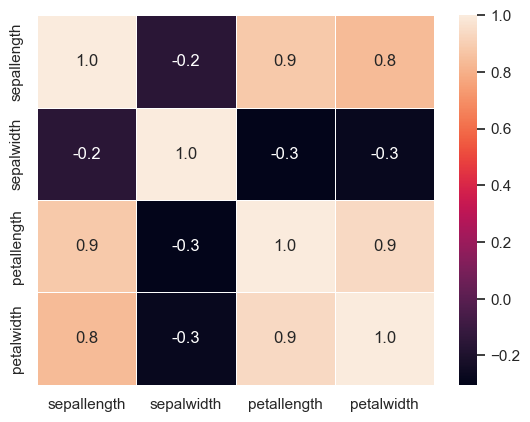

In [104]:
# Correlation matrix - Seaborn heatmap 
sns.heatmap(data=corr, annot=True, linewidths=.5, fmt= '.1f')

<AxesSubplot: >

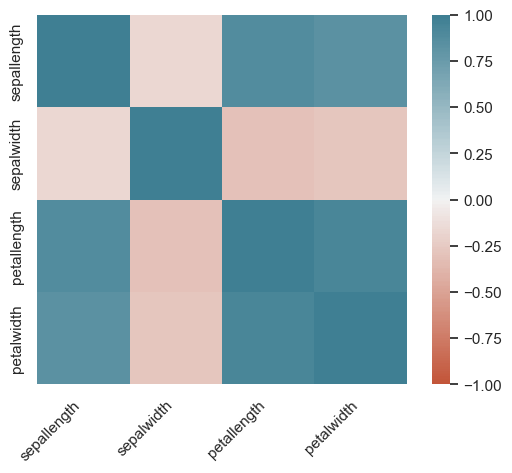

In [105]:
# Correlation matrix - customisations
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
ax

<class 'pandas.core.frame.DataFrame'>


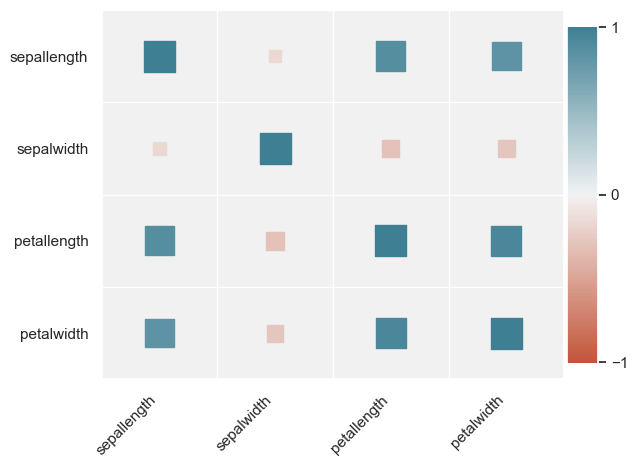

In [106]:
# Correlation matrix - https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec
import heatmap

print(type(corr))

heatmap.corrplot(corr)

## Loading the IMDB Movies Dataset

In [107]:
imdb_df = pd.read_csv("data/imdb.csv")
imdb_df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [108]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1003 non-null   int64  
 1   Title               1003 non-null   object 
 2   Genre               1003 non-null   object 
 3   Description         1003 non-null   object 
 4   Director            1003 non-null   object 
 5   Actors              1003 non-null   object 
 6   Year                1003 non-null   int64  
 7   Runtime (Minutes)   1003 non-null   int64  
 8   Rating              1003 non-null   float64
 9   Votes               1003 non-null   int64  
 10  Revenue (Millions)  875 non-null    float64
 11  Metascore           939 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 94.2+ KB


In [109]:
imdb_df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1003.000000,1003.000000,1003.000000,1003.000000,1.003000e+03,875.000000,939.000000
mean,500.027916,2012.792622,113.133599,6.723729,1.695483e+05,83.262971,58.980831
std,289.634451,3.205980,18.802899,0.946089,1.885594e+05,103.402573,17.268532
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,249.500000,2010.000000,100.000000,6.200000,3.630600e+04,13.350000,47.000000
50%,500.000000,2014.000000,110.000000,6.800000,1.108250e+05,48.020000,60.000000
75%,750.500000,2016.000000,123.000000,7.400000,2.392805e+05,114.665000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


/var/folders/f9/l17p54tx0l3b0t588z5s87xh0000gq/T/ipykernel_21491/1497733476.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = imdb_df.corr(method='spearman')


<AxesSubplot: >

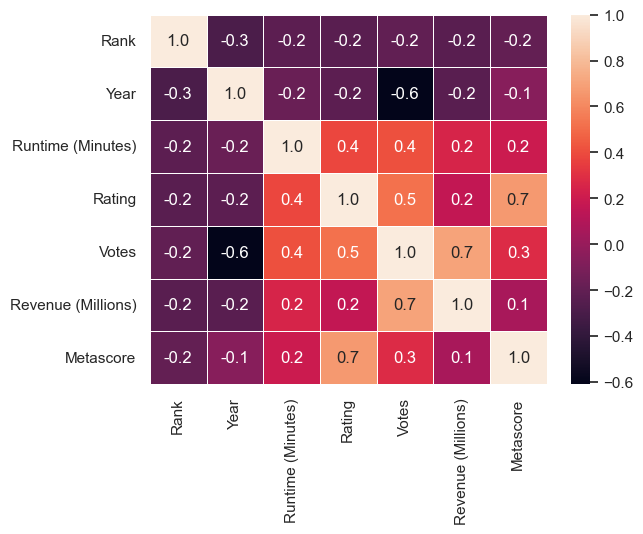

In [110]:
# Using Sparman's (non-linear relationship) - doesn't assume normal distribution
corr = imdb_df.corr(method='spearman')
sns.heatmap(data=corr, annot=True, linewidths=.5, fmt= '.1f')

## Duplicates

In [111]:
# Get a Pandas Series (vector) indicating TRUE for rows that are a duplicate
imdb_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
998     False
999     False
1000    False
1001    False
1002     True
Length: 1003, dtype: bool

In [112]:
# Counting the True/False entries - should show 3 duplicates (True)
imdb_df.duplicated().value_counts()

False    1000
True        3
dtype: int64

In [113]:
# Get the actual rows that are duplicates
duplicate_rows = imdb_df[imdb_df.duplicated()]
duplicate_rows

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
14,14,Moana,"Animation,Adventure,Comedy","In Ancient Polynesia, when a terrible curse in...",Ron Clements,"Auli'i Cravalho, Dwayne Johnson, Rachel House,...",2016,107,7.7,118151,248.75,81.0
15,14,Moana,"Animation,Adventure,Comedy","In Ancient Polynesia, when a terrible curse in...",Ron Clements,"Auli'i Cravalho, Dwayne Johnson, Rachel House,...",2016,107,7.7,118151,248.75,81.0
1002,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


In [114]:
# Removing the duplicate rows
imdb_df = imdb_df.drop_duplicates()

imdb_df.shape # should now show 1000 instances

(1000, 12)

## Missing Values

In [115]:
# Get DataFrame indicating True/False for whether values are missing or not
# True = value is missing
imdb_df.isnull()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
997,False,False,False,False,False,False,False,False,False,False,True,False
998,False,False,False,False,False,False,False,False,False,False,False,False
999,False,False,False,False,False,False,False,False,False,False,False,False
1000,False,False,False,False,False,False,False,False,False,False,True,False


In [116]:
# Get the number of missing entries per feature (column)
# PS: imdb_df.info() actually gives us information about this too
imdb_df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [117]:
# Dropping all rows with missing values
imdb_df_dropna = imdb_df.dropna()
imdb_df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838 entries, 0 to 1001
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                838 non-null    int64  
 1   Title               838 non-null    object 
 2   Genre               838 non-null    object 
 3   Description         838 non-null    object 
 4   Director            838 non-null    object 
 5   Actors              838 non-null    object 
 6   Year                838 non-null    int64  
 7   Runtime (Minutes)   838 non-null    int64  
 8   Rating              838 non-null    float64
 9   Votes               838 non-null    int64  
 10  Revenue (Millions)  838 non-null    float64
 11  Metascore           838 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.1+ KB


In [118]:
# Imputing missing values, using the mean
imdb_df_mean = imdb_df.fillna(imdb_df.mean())
imdb_df_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 1001
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  1000 non-null   float64
 11  Metascore           1000 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 101.6+ KB


/var/folders/f9/l17p54tx0l3b0t588z5s87xh0000gq/T/ipykernel_21491/2296641467.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  imdb_df_mean = imdb_df.fillna(imdb_df.mean())


In [119]:
# Imputing missing values, using the median
imdb_df_mean = imdb_df.fillna(imdb_df.median())
imdb_df_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 1001
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  1000 non-null   float64
 11  Metascore           1000 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 101.6+ KB


/var/folders/f9/l17p54tx0l3b0t588z5s87xh0000gq/T/ipykernel_21491/2693501751.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  imdb_df_mean = imdb_df.fillna(imdb_df.median())


## Missing values in rows

This is a solution to the optional task #3.

In [120]:
# Loading the dataset again, so we have missing values again..
imdb_df = pd.read_csv("data/imdb.csv")

# Does a total count of the number of rows with missing values (including a count of rows with no missing values)
imdb_df.isnull().sum(axis=1).value_counts()

0    841
1    132
2     30
dtype: int64

Next, you may want to run some code to delete rows with more than X number of missing values.
For example like this, for any rows with 2 or more missing values.

In [121]:
threshold_count = 2

# The the 'null' count for every row
df_row_null_count = imdb_df.isnull().sum(axis=1)

# Drop any rows that reach the 'threshold_count' for 'null' values
imdb_df = imdb_df.drop(df_row_null_count[df_row_null_count >= threshold_count].index, axis=0)

# Printing DataFrame information, where the total number of instances should now be less (973 compared with 1003 before)
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 973 entries, 0 to 1002
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                973 non-null    int64  
 1   Title               973 non-null    object 
 2   Genre               973 non-null    object 
 3   Description         973 non-null    object 
 4   Director            973 non-null    object 
 5   Actors              973 non-null    object 
 6   Year                973 non-null    int64  
 7   Runtime (Minutes)   973 non-null    int64  
 8   Rating              973 non-null    float64
 9   Votes               973 non-null    int64  
 10  Revenue (Millions)  875 non-null    float64
 11  Metascore           939 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 98.8+ KB


## ML Assessment Analysis

In [122]:
dataset = pd.read_csv('data/ml-assessment-dataset.csv')
dataset.head(7)

,L4 mean mark,Did formative assessment,Submitted,Plagiarism,VLE content visited,Lecture engagement,Lab engagement,Classifier impl,Code mark,Report mark,Total mark,Class
0,87,0,1,0,0.15,0.30,0.20,Ensemble,10,35,45,1
1,83,1,1,0,0.42,0.75,0.50,K-NN,28,68,96,1
2,75,0,1,0,0.38,1.00,0.80,Ensemble,28,55,83,1
3,77,1,1,0,0.80,1.00,0.90,Ensemble,30,62,92,1
4,65,0,1,1,0.34,0.50,0.15,K-NN,0,35,35,0
5,66,0,0,0,0.30,0.65,0.40,NaN,0,0,0,0
6,70,0,1,0,0.14,0.25,0.10,Ensemble,5,20,25,0


In [123]:
# Using Sparman's (non-linear relationship) - doesn't assume normal distribution
corr = dataset.corr(method='spearman')
print (corr)

                          L4 mean mark  Did formative assessment  Submitted  \
L4 mean mark                  1.000000                  0.453036   0.531852   
Did formative assessment      0.453036                  1.000000   0.275168   
Submitted                     0.531852                  0.275168   1.000000   
Plagiarism                   -0.242449                 -0.218218  -0.078811   
VLE content visited           0.435345                  0.499265   0.345063   
Lecture engagement            0.453697                  0.490768   0.441006   
Lab engagement                0.573882                  0.482344   0.351073   
Code mark                     0.652631                  0.429723   0.650205   
Report mark                   0.766479                  0.575122   0.737675   
Total mark                    0.751667                  0.538021   0.737540   
Class                         0.731202                  0.509175   0.551677   

                          Plagiarism  VLE content v

/var/folders/f9/l17p54tx0l3b0t588z5s87xh0000gq/T/ipykernel_21491/2261639191.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr(method='spearman')


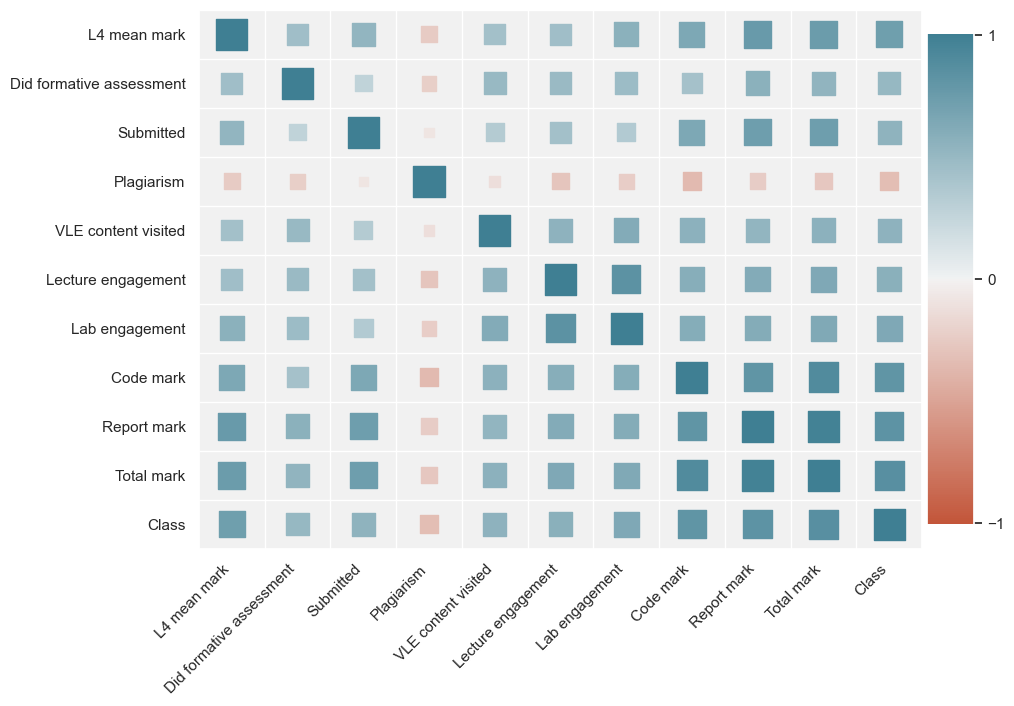

In [124]:
plt.figure(figsize=(10, 7));
heatmap.corrplot(corr)

<AxesSubplot: >

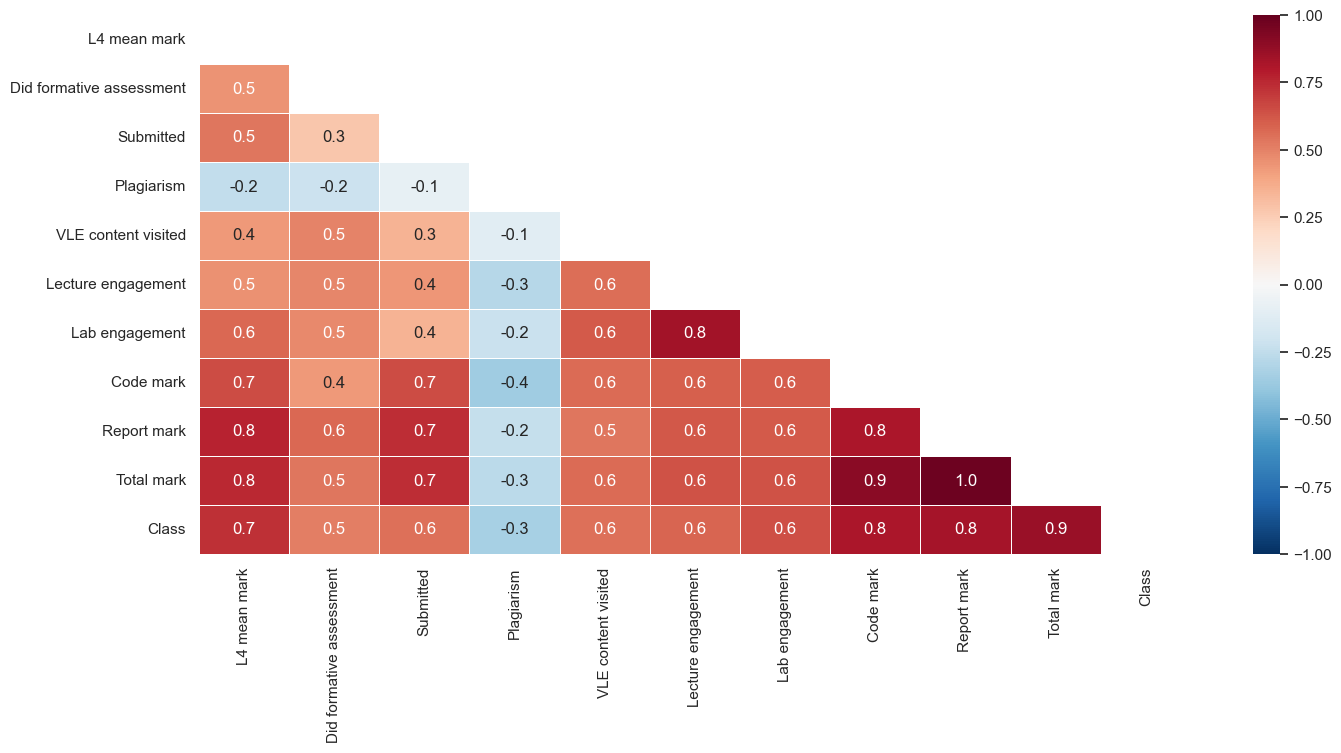

In [125]:
import numpy as np
sns.set_style("white")
# Using Sparman's (non-linear relationship) - doesn't assume normal distribution
#corr = wine_df.corr(method='spearman')

# Getting just the triangle of the correlation matrix
triangle = np.triu(corr)

# Plotting a heatmap with Seaborn
plt.figure(figsize=(16, 7))
sns.heatmap(data=corr, annot=True, mask=triangle, vmin=-1, vmax=1, cmap='RdBu_r', linewidths=.5, fmt= '.1f') # with 1 decimal precision

## BONUS - customised scatter plots for assessment dataset

1. The 1st one is from ``LAB 02``. While showing a linear trend and some outliers, it leaves many other questions open...

2. The 2nd one changes the scale, so that both axes are in the range [0, 100].

3. The 3rd one uses colours to indicate the class each datapoint belongs to, which highlights one intriguing point - somebody failed with a mark above 40%?! This is a good candidate for error in data input.

4. The 4th gives a lot more information, and is a good example of ``quality`` over quantity. This is the kind of chart that would be ideal to create for your coursework assessment!

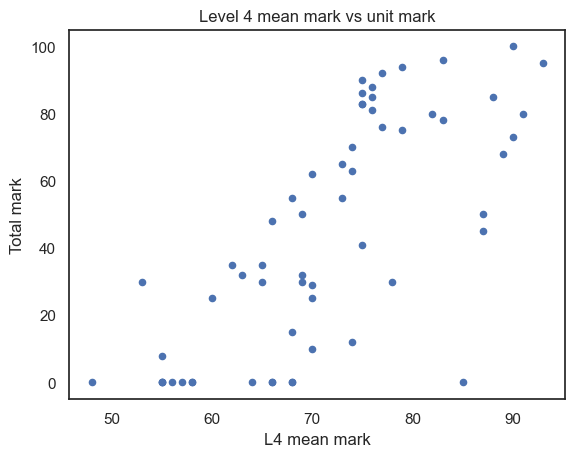

In [126]:
# a simple scatter plot
dataset.plot(kind='scatter', x='L4 mean mark', y='Total mark', title='Level 4 mean mark vs unit mark');

<Figure size 640x480 with 0 Axes>

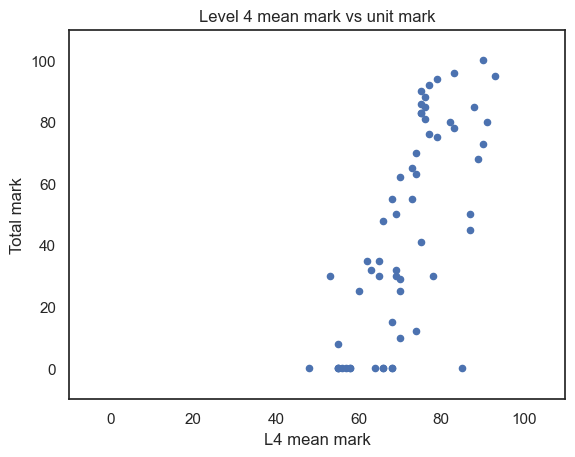

In [127]:
# Setting the scale of both axes to show the range 0-100

fig = plt.figure()
fig, ax = plt.subplots()
dataset.plot(kind='scatter', x='L4 mean mark', y='Total mark', title='Level 4 mean mark vs unit mark', ax=ax)
ax.set_xlim(-10,110)
ax.set_ylim(-10,110)
plt.show()

<Figure size 640x480 with 0 Axes>

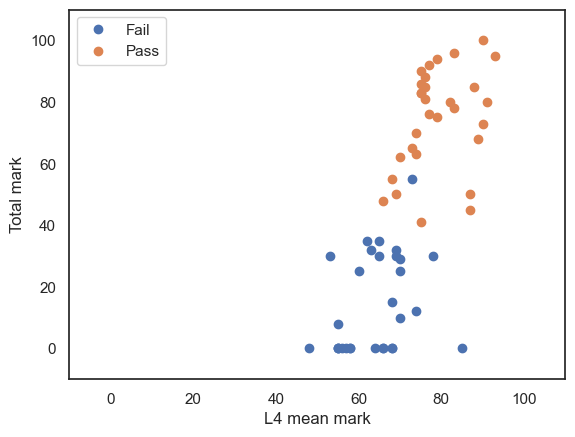

In [128]:
# Changes the markers for non-subs and plagiarism
fig = plt.figure()
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

# group the data instances according to the different classes they belong to
groups = dataset.groupby('Class')

# iterate over each group and plot (scatter)
for name, group in groups:
    ax.plot(group["L4 mean mark"], group["Total mark"], marker='.', linestyle='', ms=12, label=name)

# set labels for the y and x axes
ax.set_xlabel('L4 mean mark')
ax.set_ylabel('Total mark')

# set the value ranges for the axes
ax.set_xlim(-10,110)
ax.set_ylim(-10,110)

# add legend to the figure
# and setting the labels, so it doesn't just say 0 and 1, which are the original class labels
ax.legend(["Fail", "Pass"]);

<Figure size 640x480 with 0 Axes>

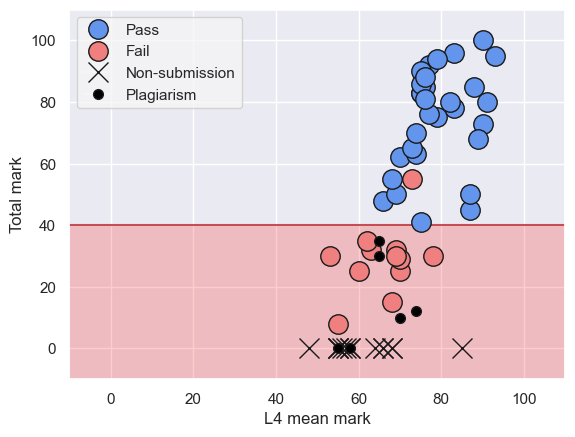

In [134]:
# Importing this in order to manually set up the legend further below
from matplotlib.lines import Line2D

# Adds default seaborn styling to the matplotlib figure
sns.set_theme()

# Initialises matplotlib figure
fig = plt.figure()
fig, ax = plt.subplots()

# Getting the unique class labels
# We know its 0 for fail and 1 for pass, but here's a generic piece of code you can use
unique_labels = dataset['Class'].unique()

# Setting up colours for each of the classes
# This is hard coded for this example, but there are ways we'll see next week to set up using colour themes
colours = ['cornflowerblue', 'lightcoral']

# Creates a copy of the dataset with just the columns we want
dataset_tmp = dataset[["L4 mean mark","Total mark","Submitted", "Plagiarism", "Class"]]

# Adds a red background colour for the "fail" area
rectangle = plt.Rectangle((-10, 40), 120, -50, facecolor="red", alpha=0.2, label='_hidden')
ax.add_patch(rectangle)

# Plot a red line to mark the pass/fail threshold
plt.axhline(y = 40, color = 'r', linestyle = '-', label='_hidden') 

# For each class, plot the actual data points
#  - This will use different shapes and colours for the markers
#  - https://matplotlib.org/stable/api/markers_api.html
for label, colour in zip(unique_labels, colours):
    
    # Get a subset of the dataset for one class as the for loop iterates
    dataset_class = dataset_tmp[dataset_tmp['Class'] == label]
    
    # Get a subset for all who submitted and did not plagiarise and plot them
    dataset_class_tmp = dataset_class[(dataset_class['Submitted'] == 1) & (dataset_class['Plagiarism'] == 0)]
    plt.plot(dataset_class_tmp["L4 mean mark"], dataset_class_tmp["Total mark"], linestyle='',
             marker='o', markerfacecolor=colour, markeredgecolor='k', markersize=14, label='Pass/Fail')
    
    # Get a subset for those who did not submit and plot them
    dataset_class_tmp = dataset_class[dataset_class['Submitted'] == 0]
    plt.plot(dataset_class_tmp["L4 mean mark"], dataset_class_tmp["Total mark"], linestyle='',
             marker='x', markerfacecolor=colour, markeredgecolor='k', markersize=14, label='Non-submission')
    
    # Get a subset for those who did plagiarise and plot them
    dataset_class_tmp = dataset_class[dataset_class['Plagiarism'] == 1]
    plt.plot(dataset_class_tmp["L4 mean mark"], dataset_class_tmp["Total mark"], linestyle='',
             marker='.', markerfacecolor='black', markeredgecolor='k', markersize=14, label='Plagiarism')

# set labels for the y and x axes
ax.set_xlabel('L4 mean mark')
ax.set_ylabel('Total mark')

# set the value ranges for the axes
ax.set_xlim(-10,110)
ax.set_ylim(-10,110)

# setting up legend elements
legend_elements = [
    Line2D([0], [0], label='Pass', marker='o', markerfacecolor=colours[0], markeredgecolor='k', markersize=14, color='whitesmoke'),
    Line2D([0], [0], label='Fail', marker='o', markerfacecolor=colours[1], markeredgecolor='k', markersize=14, color='whitesmoke'),
    Line2D([0], [0], label='Non-submission', marker='x', markerfacecolor='black', markeredgecolor='k', markersize=14, color='whitesmoke'),
    Line2D([0], [0], label='Plagiarism', marker='.', markerfacecolor='black', markeredgecolor='k', markersize=14, color='whitesmoke')
]

# add legend to the figure
ax.legend(handles=legend_elements, loc='upper left', facecolor="whitesmoke")

# finally, call to render the figure
plt.show()

## BONUS - violin plots

https://seaborn.pydata.org/generated/seaborn.violinplot.html

https://towardsdatascience.com/violin-plots-explained-fb1d115e023d

<AxesSubplot: xlabel='Plagiarism', ylabel='Total mark'>

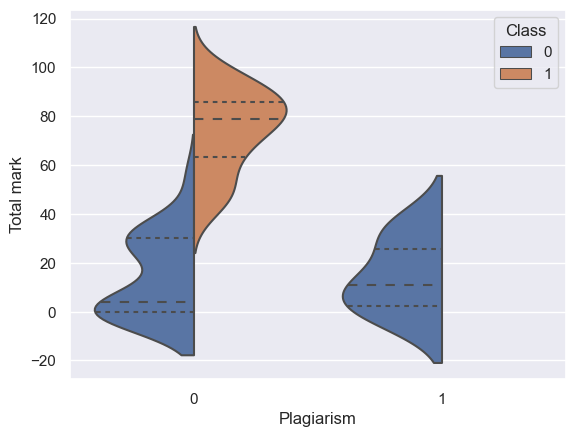

In [130]:
sns.violinplot(data=dataset, x="Plagiarism", y="Total mark", hue="Class", split=True, inner="quart")

The violin plot (above) shows us:

* The distribution of marks for each of the classes, for students who did not plagiarise (0, on the left) and for students who did plagiarise (1, on the right).
* We see that all students who plagiarised failed (the blue on the right hand side), but that not all got a zero.
* We see that for students who did not plagiarise and passed the assignment, got a median mark of 80%.
* We also see that the way violin plots work, it looks like some students have gotten marks they didn't actually get (-20 for example), so you need to bear in mind how violin plots are created (the second article above explains them)